## **Importing libraries**

In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from itertools import chain
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import time
import glob

import tensorflow as tf
from tensorflow import keras


## **Importing images**

### **Creating placeholder arrays**

In [68]:
# There are 250 pictures per class, 150x150 pixels, total 1250 samples.

# Create placeholder arrays  
X = np.zeros((1250, 150, 150))
y = np.zeros(1250)

print(X.shape, y.shape)

(1250, 150, 150) (1250,)


### **Fetch filenames**

In [69]:
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
folders = ["hello", "iloveyou", "no", "sorry", "yes"]
folder_path = "C:\\Users\\visha\\OneDrive\\Documentos\\Code\\endor\\sign_language\\Images\\test_run_images\\"
file_names = []

# Create a list with all of the images
for folder in folders:
    for f in glob.glob(folder_path + folder + '/**/*', recursive=True):
        if f[-4:] == '.jpg':
            file_names.append(f)
            
print(len(file_names))

1250


### **Save features in X array**

In [70]:
for i, file in enumerate(file_names):
    image = np.array(Image.open(file).convert('L'))
    X[i] = image

print(X.shape)

(1250, 150, 150)


In [71]:
X = X.astype(np.float32)
print(X.shape, X.dtype)

(1250, 150, 150) float32


### **Save labels in y array**

In [72]:
# Create the labels array
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
y[0:249] = 0
y[249:499] = 1
y[499:749] = 2
y[749:999] = 3
y[999:-1] = 4

y = y.astype(np.int64)
print(y.dtype)
print(np.unique(y, return_counts=True))

int64
(array([0, 1, 2, 3, 4], dtype=int64), array([250, 250, 250, 250, 250], dtype=int64))


### **Visualize samples**

Label: 0


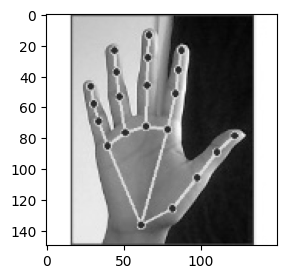

In [73]:
# Visualize a training sample
plt.figure(figsize=(3,3))
plt.imshow(X[0].reshape((150,150)), cmap="gray")
print("Label:", y[0])

Label: 1


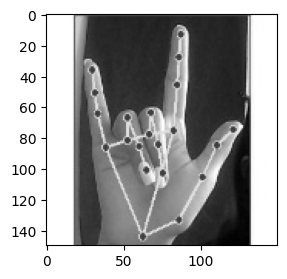

In [74]:
# Visualize a training sample
plt.figure(figsize=(3,3))
plt.imshow(X[351].reshape((150,150)), cmap="gray")
print("Label:", y[351])

## **Separating train and test data**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1125, 150, 150) (1125,)
(125, 150, 150) (125,)


## **Configuring batch loaders**

## **Setting up the NN**

In [76]:
# Defining the model architecture
# * Input layer: 22500 features (150x150 pixels)
# * Output layer: 5, one per class.
# * Uses Softmax function to get class probabilities.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model

## **Training the model**

In [78]:
start_time = time.time()
epochs = 20

model.fit(X_train, y_train, epochs=epochs)

# Print how long the training/testing took
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch 1/20
36/36 [==============================] - 14s 380ms/step - loss: 3564.6428 - accuracy: 0.3262
Epoch 2/20
36/36 [==============================] - 13s 355ms/step - loss: 266.5511 - accuracy: 0.7111
Epoch 3/20
36/36 [==============================] - 13s 355ms/step - loss: 175.4819 - accuracy: 0.7484
Epoch 4/20
36/36 [==============================] - 13s 353ms/step - loss: 86.5294 - accuracy: 0.8578
Epoch 5/20
36/36 [==============================] - 13s 354ms/step - loss: 390.6856 - accuracy: 0.7200
Epoch 6/20
36/36 [==============================] - 13s 357ms/step - loss: 182.6744 - accuracy: 0.8373
Epoch 7/20
36/36 [==============================] - 13s 356ms/step - loss: 41.9426 - accuracy: 0.9307
Epoch 8/20
36/36 [==============================] - 13s 359ms/step - loss: 73.3791 - accuracy: 0.8996
Epoch 9/20
36/36 [==============================] - 13s 355ms/step - loss: 46.3808 - accuracy: 0.9244
Epoch 10/20
36/36 [==============================] - 13s 352ms/step - loss: 

## **Evaluating the model**

In [83]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 173.1068 - accuracy: 0.7920 - 61ms/epoch - 15ms/step

Test accuracy: 0.7919999957084656


In [84]:
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
class_names = ["hello", "iloveyou", "no", "sorry", "yes"]
predictions = model.predict(X_test)

4/4 [==============================] - 0s 15ms/step


In [86]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

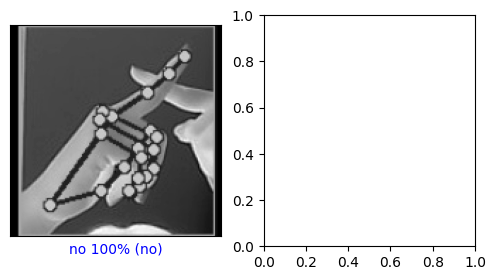

In [90]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  y_test)
plt.show()

## **Save model for inference**

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 22500)             0         
                                                                 
 dense_13 (Dense)            (None, 1000)              22501000  
                                                                 
 dense_14 (Dense)            (None, 100)               100100    
                                                                 
 dense_15 (Dense)            (None, 5)                 505       
                                                                 
Total params: 22,601,605
Trainable params: 22,601,605
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.save("C:/Users/visha/OneDrive/Documentos/Code/endor/sign_language/Model/Model_1.h5", save_format='h5')